In [54]:
import numpy as np
import random
import skimage.data as da
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
from sklearn.cluster import KMeans
import os
import skimage.io as io
from skimage.filters import threshold_otsu


In [128]:
def lloyd(image, k):
    shape = image.shape
    reshaped = image.reshape(-1, 1)

    kmeans = KMeans(n_clusters = k).fit(reshaped)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    image_flat = cluster_centers[cluster_labels]
    
    return image_flat.reshape(shape)

from collections import Counter

# most common function taken from:
# https://stackoverflow.com/questions/1518522/find-the-most-common-element-in-a-list
def most_common(lst):
    return max(set(lst), key=lst.count)

def clean(img, num_pix = 8, iters = 5):
    
    # initialize an emtpy output matrix in the same shape as input image
    # output = np.zeros((img.shape[0], img.shape[1]))
    img = img.copy()
    
    for i in range(iters):
    # iter over the emtpy output image and fill in the values
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                # TBD: what to do with the edges?
                if i == 0 or i == img.shape[0]-1 or j == 0 or j == img.shape[1]-1:
                    continue
                else:
                    change_list = [img[i, j]]
                    content = img[i-1:i+2, j-1:j+2]

                    if num_pix == 8:
                        change_list = list(content.flatten())

                    else:
                        array = np.array([[False, True, False],
                                           [True, True, True],
                                           [False, True, False]])
                        change_list = list(content[array].flatten())

                    # assign the output images pixel value 
                    # the most frequent value over all the values of our list
                    img[i, j] = most_common(change_list)

    return img

In [129]:
# All images from absalon
path = "data"
images = [io.imread(os.path.join(path,filename)) for filename in os.listdir(path)]

In [131]:
lloyd_imgs = []
otsu_imgs = []

for image in images:
    lloyd_img = lloyd(image, 2)
    lloyd_imgs.append(lloyd_img)
    thresh = threshold_otsu(image)
    otsu = image > thresh
    otsu_imgs.append(otsu)


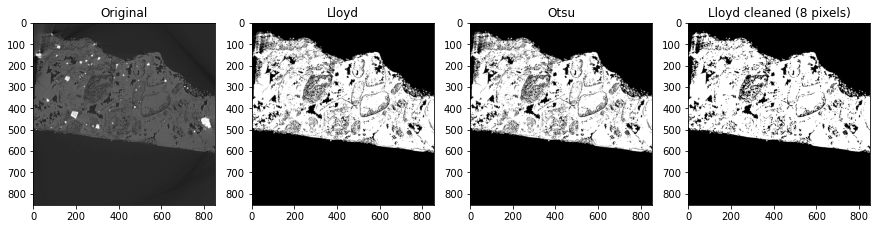

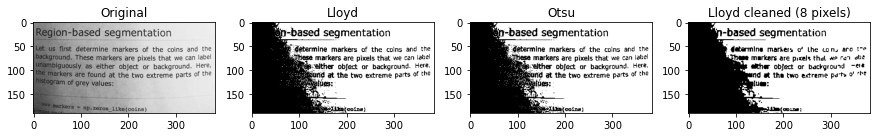

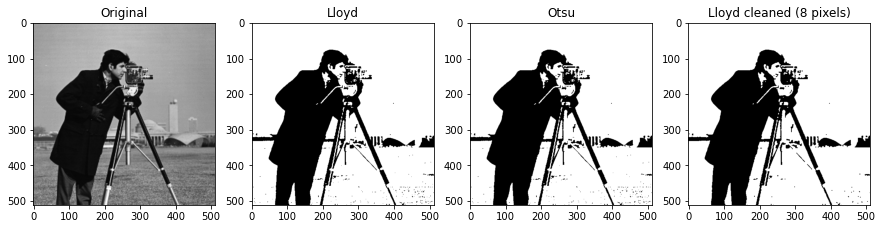

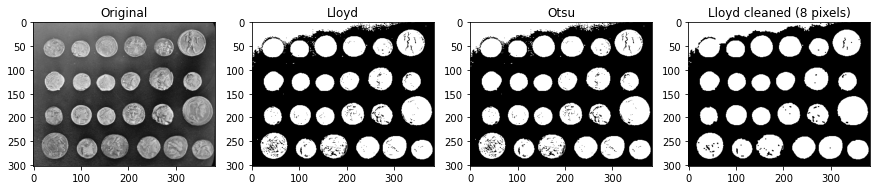

In [132]:
for idx in range(0, len(images)):
    fig, ax = plt.subplots(1,3,figsize=(15,5))
    ax[0].imshow(images[idx], cmap='gray')
    ax[0].set_title('Original')
    # NOTE: centroids of image are the mean of the colors instead of 1 and 0

    ax[1].imshow(lloyd_imgs[idx],cmap='gray')
    ax[1].set_title('Lloyd')

    ax[2].imshow(otsu_imgs[idx],cmap='gray')
    ax[2].set_title('Otsu')

    plt.show()

In [139]:
cleaned_lloyd = []
iterations = [1,5]
pixels = [8, None]

a = clean(lloyd_imgs[2], pixels[0], iterations[0])
b = clean(lloyd_imgs[2], pixels[0], iterations[1])
c = clean(lloyd_imgs[2], pixels[1], iterations[0])
d = clean(lloyd_imgs[2], pixels[1], iterations[1])

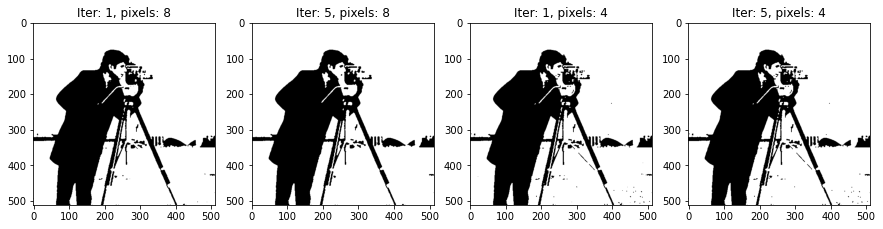

In [142]:
fig, ax = plt.subplots(1,4,figsize=(15,5))
ax[0].imshow(a, cmap='gray')
ax[0].set_title('Iter: 1, pixels: 8')
# NOTE: centroids of image are the mean of the colors instead of 1 and 0

ax[1].imshow(b,cmap='gray')
ax[1].set_title('Iter: 5, pixels: 8')

ax[2].imshow(c,cmap='gray')
ax[2].set_title('Iter: 1, pixels: 4')

ax[3].imshow(d,cmap='gray')
ax[3].set_title('Iter: 5, pixels: 4')

plt.show()